import libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

get data from the given url

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"


names=['Alcohol', 'Malic acid','Ash','Alcalinity of Ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanons', 'Color intensity','Hue','OD280/OD315 of diluted wines','Proline','Target']
df = pd.read_csv(url,names=names)
df.describe()
display(df)

,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanons,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Target
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


sepperating between feature and labels and standarized the given features

In [ ]:
features = ['Alcohol', 'Malic acid','Ash','Alcalinity of Ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanons', 'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

print(x)

[[-1.21394365  1.51861254 -0.5622498  ...  0.25171685  0.36217728
   1.84791957]
 [-1.21394365  0.24628963 -0.49941338 ... -0.29332133  0.40605066
   1.1134493 ]
 [-1.21394365  0.19687903  0.02123125 ...  0.26901965  0.31830389
   0.78858745]
 ...
 [ 1.37386437  0.33275817  1.74474449 ...  2.22423597 -1.61212515
  -1.48544548]
 [ 1.37386437  0.20923168  0.22769377 ...  1.83492299 -1.56825176
  -1.40069891]
 [ 1.37386437  1.39508604  1.58316512 ...  1.79166599 -1.52437837
  -1.42894777]]


apply PCA on the 3 feature and convert it to 2 dimensional with PC1 and PC2 as the feature

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
display(principalDf)

,PC1,PC2
0,-3.260580,1.736054
1,-2.358620,-0.509786
2,-2.453376,1.120704
3,-3.253148,2.686416
4,-1.403734,1.320100
...,...,...
173,3.886054,1.707484
174,3.148970,1.386257
175,3.384134,2.255285
176,3.078204,1.791104


plot the processed feature that is used by pca. plotting the data based on PC1 and PC2 to get general representation

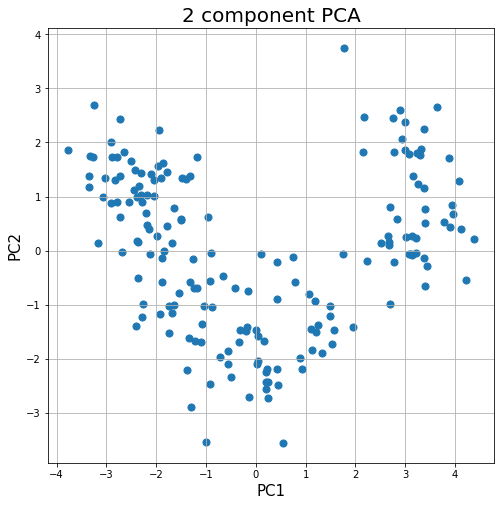

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:,'PC2'], s = 50)
ax.grid()